### Petrol Consumption- RandomForestRegressor
### Random Forest  with Python and Scikit-Learn

In [352]:
import pandas as pd
import numpy as np

In [353]:
### Get data
dataset = pd.read_csv('petrol_consumption.csv')

### Identification of Variables and data type

In [354]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

### Summary Statistics

In [355]:
dataset.min()

Petrol_tax                         5.000
Average_income                  3063.000
Paved_Highways                   431.000
Population_Driver_licence(%)       0.451
Petrol_Consumption               344.000
dtype: float64

In [356]:
dataset.max()

Petrol_tax                         10.000
Average_income                   5342.000
Paved_Highways                  17782.000
Population_Driver_licence(%)        0.724
Petrol_Consumption                968.000
dtype: float64

In [357]:
dataset.std()

Petrol_tax                         0.950770
Average_income                   573.623768
Paved_Highways                  3491.507166
Population_Driver_licence(%)       0.055470
Petrol_Consumption               111.885816
dtype: float64

### 3. Preparing Data For Training
### Two tasks will be performed in this section.
### The first task is to divide data into 'attributes' and 'label' sets.
### The resultant data is then divided into training and test sets.
### The following script divides data into attributes and labels:

In [358]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [359]:
### X

In [360]:
### y

# Finally, let's divide the data into training and testing sets:

In [361]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 4. Feature Scaling  ### +++++++++++++++++++++++++++++++++++++
### We know our dataset is not yet a scaled value, for instance the Average_Income
### field has values in the range of thousands while Petrol_tax has values in range of tens.
### Therefore, it would be beneficial to scale our data (although, as mentioned earlier,
### this step isn't as important for the random forests algorithm).
### To do so, we will use Scikit-Learn's StandardScaler class.
### Execute the following code to do so:
### Feature Scaling

In [362]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5. Training the Algorithm ++++++++++++++++++++++++++++++++++++++++++++
### Now that we have scaled our dataset, it is time to train our random forest
### algorithm to solve this regression problem. Execute the following code:

In [363]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### The RandomForestRegressor class of the sklearn.ensemble library is used
### to solve regression problems via random forest.
### The most important parameter of the RandomForestRegressor class is
### the n_estimatorsparameter. This parameter defines the number of trees in the random forest.
### We will start with n_estimator=20 to see how our algorithm performs.
### You can find details for all of the parameters of RandomForestRegressor here.

###  Evaluating the Algorithm  ++++++++++++++++++++++++++++++==###
### The last and final step of solving a machine learning problem is to evaluate
### the performance of the algorithm. For regression problems the metrics used to
### evaluate an algorithm are mean absolute error, mean squared error,
### and root mean squared error. Execute the following code to find these values:

In [364]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print()

Mean Absolute Error: 51.76500000000001

Mean Squared Error: 4216.166749999999

Root Mean Squared Error: 64.93201637097064



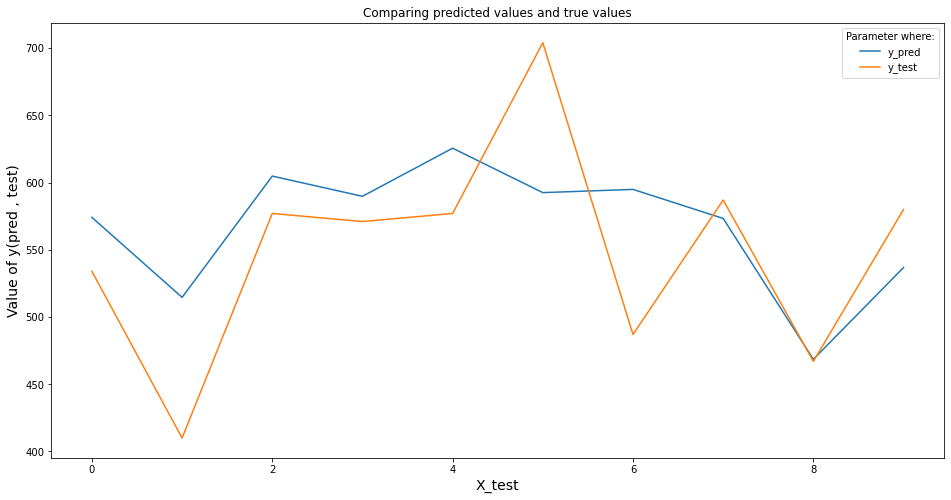

In [365]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(y_pred,  label='y_pred')
plt.plot(y_test, label='y_test')
plt.xlabel('X_test', fontsize=14)
plt.ylabel('Value of y(pred , test)', fontsize=14)
plt.title('Comparing predicted values and true values')
plt.legend(title='Parameter where:')
plt.show()
